In [ ]:
import os
import zipfile

zip_file_path = "/content/drive/MyDrive/diplast/newpart2.zip"

extraction_dir = "/content/drive/MyDrive/diplast/extracted"

os.makedirs(extraction_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

TRAINDIR = os.path.join(extraction_dir, "train")
VALDIR = os.path.join(extraction_dir, "test")
IMAGES = 20

classes_train = os.listdir(TRAINDIR)
classes_valid = os.listdir(VALDIR)

print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "/kaggle/input/fer2013/"

#  the labels (emotions) based on folder names
labels = os.listdir(os.path.join(dataset_dir, "train"))

emotion_list = []
pixels_list = []
usage_list = []

#  to read and convert an image to pixel values
def read_and_convert_image(image_path):
    img = Image.open(image_path)
    img = img.convert("L")  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to a consistent size (adjust as needed)
    return " ".join(str(pixel) for pixel in img.getdata())

# Iterate through train and test folders
for usage in ["train", "test"]:
    for label in labels:
        label_dir = os.path.join(dataset_dir, usage, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)

            # Read and convert the image to pixel values
            pixels = read_and_convert_image(image_path)

            # Append data to the lists
            emotion_list.append(labels.index(label))
            pixels_list.append(pixels)
            usage_list.append(usage)

# Create a DataFrame from the lists
data = {"emotion": emotion_list, "pixels": pixels_list, "Usage": usage_list}
df = pd.DataFrame(data)

csv_filename = "emotion_dataset.csv"
df.to_csv(csv_filename, index=False)
print(f"CSV file saved as {csv_filename}")


CSV file saved as emotion_dataset.csv


This code reads images from a dataset directory, converts them to grayscale, resizes them, and stores the pixel values along with emotion labels and dataset usage information. It then saves this data as a CSV file for use in machine learning tasks. Essentially, it prepares image data for analysis and modeling.

In [ ]:
df

,emotion,pixels,Usage
0,0,0 1 10 81 140 100 115 160 155 140 124 120 130 ...,train
1,0,223 229 232 243 241 233 228 209 229 213 207 20...,train
2,0,83 122 161 158 116 94 120 149 157 162 169 175 ...,train
3,0,0 0 3 7 36 66 37 35 60 90 118 137 155 166 172 ...,train
4,0,255 255 255 255 255 255 255 255 255 249 253 25...,train
...,...,...,...
35882,6,255 251 255 203 107 84 74 71 55 58 61 75 113 1...,test
35883,6,215 141 154 198 90 76 48 43 43 54 52 53 53 32 ...,test
35884,6,50 114 134 55 61 43 64 57 96 101 74 158 139 12...,test
35885,6,49 50 51 53 55 57 58 57 58 58 56 58 56 60 59 6...,test


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/fer2013.csv')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

Assigning emotions for better understanding

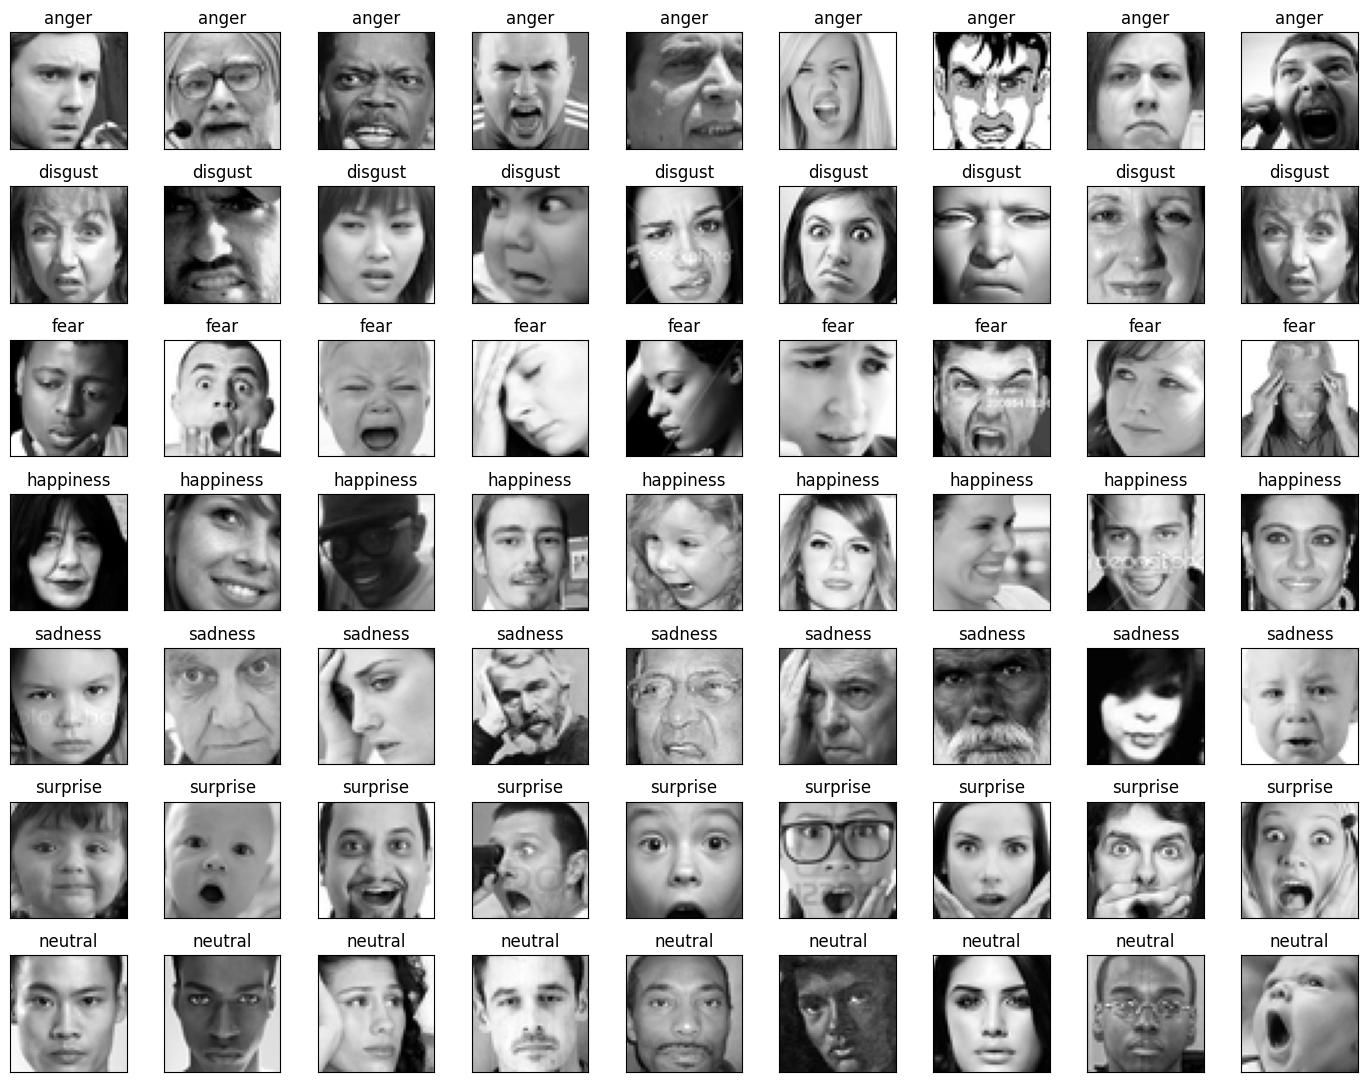

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(9):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(9, 9, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

This code creates a 9x9 grid of grayscale images for different emotion labels. It iterates through emotion labels, extracts pixel data, and displays them in individual subplots. The code utilizes Matplotlib and NumPy to visualize and organize the images for better understanding of the dataset. It's a way to visually inspect and comprehend the emotions represented in the dataset.

In [8]:
extraction_dir = "/content/drive/MyDrive/diplast/extracted/newpart2/"


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size  = 128
image_size=48
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(extraction_dir+"train",
                                              target_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(extraction_dir+"test",
                                              target_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [11]:
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

In [12]:
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

In [13]:
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [16]:
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

In [17]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

model.add(Dense(classes, activation='softmax'))



opt = Adam(lr = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)      

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [19]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list)

<ipython-input-19-9886a6645606>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
224/224 [==============================] - ETA: 0s - loss: 1.7647 - accuracy: 0.3258

224/224 [==============================] - 74s 238ms/step - loss: 1.7647 - accuracy: 0.3258 - val_loss: 1.7005 - val_accuracy: 0.3578 - lr: 0.0010
Epoch 2/48
224/224 [==============================] - ETA: 0s - loss: 1.4042 - accuracy: 0.4618

224/224 [==============================] - 53s 237ms/step - loss: 1.4042 - accuracy: 0.4618 - val_loss: 1.2823 - val_accuracy: 0.5127 - lr: 0.0010
Epoch 3/48
224/224 [==============================] - ETA: 0s - loss: 1.2617 - accuracy: 0.5160

224/224 [==============================] - 53s 236ms/step - loss: 1.2617 - accuracy: 0.5160 - val_loss: 1.2702 - val_accuracy: 0.5124 - lr: 0.0010
Epoch 4/48
224/224 [==============================] - ETA: 0s - loss: 1.1814 - accuracy: 0.5501

224/224 [==============================] - 53s 235ms/step - loss: 1.1814 - accuracy: 0.5501 - val_loss: 1.2938 - val_accuracy: 0.5121 - lr: 0.0010
Epoch 5/48
224/224 [==============================] - ETA: 0s - loss: 1.1263 - accuracy: 0.5708

224/224 [==============================] - 53s 237ms/step - loss: 1.1263 - accuracy: 0.5708 - val_loss: 1.4080 - val_accuracy: 0.4482 - lr: 0.0010
Epoch 6/48
224/224 [==============================] - ETA: 0s - loss: 1.0670 - accuracy: 0.5948

224/224 [==============================] - 53s 238ms/step - loss: 1.0670 - accuracy: 0.5948 - val_loss: 1.1835 - val_accuracy: 0.5479 - lr: 0.0010
Epoch 7/48
224/224 [==============================] - ETA: 0s - loss: 1.0318 - accuracy: 0.6069

224/224 [==============================] - 52s 233ms/step - loss: 1.0318 - accuracy: 0.6069 - val_loss: 1.1960 - val_accuracy: 0.5481 - lr: 0.0010
Epoch 8/48
224/224 [==============================] - ETA: 0s - loss: 0.9877 - accuracy: 0.6269

224/224 [==============================] - 53s 236ms/step - loss: 0.9877 - accuracy: 0.6269 - val_loss: 1.2459 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 9/48
224/224 [==============================] - ETA: 0s - loss: 0.9433 - accuracy: 0.6436

224/224 [==============================] - 53s 236ms/step - loss: 0.9433 - accuracy: 0.6436 - val_loss: 1.1372 - val_accuracy: 0.5776 - lr: 0.0010
Epoch 10/48
224/224 [==============================] - ETA: 0s - loss: 0.9003 - accuracy: 0.6595

224/224 [==============================] - 53s 238ms/step - loss: 0.9003 - accuracy: 0.6595 - val_loss: 1.2637 - val_accuracy: 0.5272 - lr: 0.0010
Epoch 11/48
224/224 [==============================] - ETA: 0s - loss: 0.8525 - accuracy: 0.6809

224/224 [==============================] - 53s 236ms/step - loss: 0.8525 - accuracy: 0.6809 - val_loss: 1.1399 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 12/48
224/224 [==============================] - ETA: 0s - loss: 0.8136 - accuracy: 0.6962

224/224 [==============================] - 53s 235ms/step - loss: 0.8136 - accuracy: 0.6962 - val_loss: 1.1033 - val_accuracy: 0.6069 - lr: 0.0010
Epoch 13/48
224/224 [==============================] - ETA: 0s - loss: 0.7681 - accuracy: 0.7126

224/224 [==============================] - 53s 235ms/step - loss: 0.7681 - accuracy: 0.7126 - val_loss: 1.3383 - val_accuracy: 0.5339 - lr: 0.0010
Epoch 14/48
224/224 [==============================] - ETA: 0s - loss: 0.7199 - accuracy: 0.7296

224/224 [==============================] - 54s 241ms/step - loss: 0.7199 - accuracy: 0.7296 - val_loss: 1.1763 - val_accuracy: 0.6087 - lr: 0.0010
Epoch 15/48
224/224 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.7441Restoring model weights from the end of the best epoch: 12.



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 53s 235ms/step - loss: 0.6814 - accuracy: 0.7441 - val_loss: 1.3650 - val_accuracy: 0.5352 - lr: 0.0010
Epoch 15: early stopping


In [20]:
# Access the training and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the final accuracy values (at the last epoch)
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")


Final Training Accuracy: 0.7441
Final Validation Accuracy: 0.5352


In [21]:
# Assuming you have already trained your model and it's stored in the 'model' variable

# Save the model to an HDF5 file
model.save("trained_model22.h5")

print("Model saved to trained_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to trained_model.h5


Loading image: /content/drive/MyDrive/diplast/extracted/newpart2/train/fear/Training_10018621.jpg
Loading image: /content/drive/MyDrive/diplast/extracted/newpart2/train/fear/Training_10031494.jpg
Loading image: /content/drive/MyDrive/diplast/extracted/newpart2/train/fear/Training_10110501.jpg
Loading image: /content/drive/MyDrive/diplast/extracted/newpart2/train/fear/Training_10117992.jpg
Loading image: /content/drive/MyDrive/diplast/extracted/newpart2/train/fear/Training_10126156.jpg
1/1 [==============================] - 0s 236ms/step
Predicted emotion: Fear


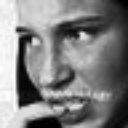

1/1 [==============================] - 0s 36ms/step
Predicted emotion: Sad


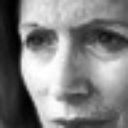

1/1 [==============================] - 0s 31ms/step
Predicted emotion: Surprise


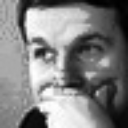

1/1 [==============================] - 0s 27ms/step
Predicted emotion: Fear


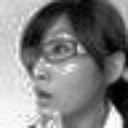

1/1 [==============================] - 0s 27ms/step
Predicted emotion: Sad


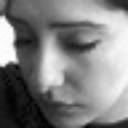

In [26]:
import numpy as np
import cv2
import os
import random
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the saved model
model = load_model('trained_model22.h5')

# Base directory for training images
base_dir = "/content/drive/MyDrive/diplast/extracted/newpart2/train"

# Emotion mapping
emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Natural', 5: 'Sad', 6: 'Surprise'}

# Load few images from random emotion folders
def load_images_randomly(base_dir, num_images=5):
    images = []
    emotion_folders = os.listdir(base_dir)
    random.shuffle(emotion_folders)  # Shuffle to get random folders

    for folder in emotion_folders:
        folder_path = os.path.join(base_dir, folder)
        for filename in sorted(os.listdir(folder_path))[:num_images]:
            img_path = os.path.join(folder_path, filename)
            print("Loading image:", img_path)  # Debug: Print the image path
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Failed to load image at {img_path}")
                continue

            img_resized = cv2.resize(img, (48, 48))
            img_display = cv2.resize(img, (128, 128))  # Increase size for display
            img_expanded = np.expand_dims(img_resized, axis=-1)
            img_expanded = np.expand_dims(img_expanded, axis=0)
            images.append((img_display, img_expanded))

            if len(images) >= num_images:
                return images

    return images

# Make predictions
def predict_images(images):
    for img_display, img_predict in images:
        prediction = model.predict(img_predict)
        predicted_class = np.argmax(prediction, axis=1)
        emotion = emotion_dict.get(predicted_class[0], "Unknown")

        print("Predicted emotion:", emotion)

        # Display the image using cv2_imshow (for Google Colab)
        cv2_imshow(img_display)

# Load and predict images
sample_images = load_images_randomly(base_dir, 5)
predict_images(sample_images)


1/1 [==============================] - 0s 219ms/step
Predicted emotion: Sad


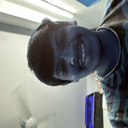

In [27]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from PIL import Image

# Load the saved model
model = load_model('trained_model22.h5')

# Emotion mapping
emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Natural', 5: 'Sad', 6: 'Surprise'}

# Function to preprocess the image
def preprocess_image(image_path, target_size=(48, 48)):
    image = Image.open(image_path)
    if image.mode != "L":
        image = image.convert("L")  # Convert to grayscale
    image = image.resize(target_size)
    image = np.asarray(image)
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

# Function to predict the emotion of the image
def predict_emotion(image_path):
    # Load and preprocess the image
    processed_img = preprocess_image(image_path)

    # Make predictions
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)
    emotion = emotion_dict.get(predicted_class[0], "Unknown")

    print("Predicted emotion:", emotion)

    # Display the original image
    img_show = Image.open(image_path)
    img_show = img_show.resize((128, 128))  # Resize for display
    cv2_imshow(np.array(img_show))

# Image path
image_path = '/content/IMG_8314.jpg'

# Predict the emotion
predict_emotion(image_path)
